In [1]:
%matplotlib inline
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

from experiment1 import Autoencoder, to_img

torch.manual_seed(42)

In [2]:
batch_size = 32

# Load data
img_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

dataset = MNIST('../data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Load model
model = Autoencoder()
model_state = torch.load('../trained_models/experiment1.pth')
model.load_state_dict(model_state)

In [3]:
full_latent_space = []
all_labels = []

for index, batch in enumerate(dataloader):
    image, label = batch
    latent, reconst = model(image)
    latent = latent.detach().numpy()
    reconst = reconst.detach().numpy()
    
    full_latent_space.append(latent)
    all_labels.append(label)
    
    if index == 49:
        break

full_latent_space = np.concatenate(full_latent_space, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

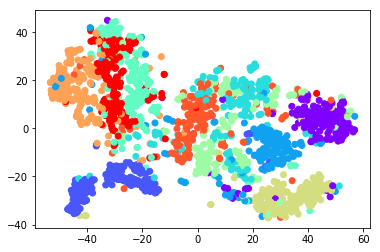

In [4]:
tsne = TSNE(random_state=42)
transformed = tsne.fit_transform(full_latent_space)
color_mapping = matplotlib.cm.rainbow(np.linspace(0, 1, 10))
colors = [color_mapping[cl] for cl in all_labels]
plt.scatter(transformed[:, 0], transformed[:, 1], c=colors)